In [9]:
from u_shaped_lib import CSH, HighFinesse_FN as HF #Modified data is used, so we load CSH and not CSH_unmodified (where division with prop factor is needed)
import matplotlib.pyplot as plt
import numpy as np
import tabulate
import sys
import os
import pandas as pd

In [2]:
dir_200_old = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Weird_data\Old_lensed_fiber\200 counts"
dir_200_new = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Weird_data\New_lensed_fiber\200 counts"

dir_hf_old = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Weird_data\Old_lensed_fiber\HighFinesse"
dir_hf_new = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Weird_data\New_lensed_fiber\HighFinesse"


data_200_old = CSH.get_data(dir_200_old)

data_200_new = CSH.get_data(dir_200_new)

data_hf_old = HF.get_data(dir_hf_old)

data_hf_new = HF.get_data(dir_hf_new) 


In [3]:
stat_200_old = np.array([np.average(data_200_old[0]),np.std(data_200_old[0])])*1e-3
stat_200_new = np.array([np.average(data_200_new[0]),np.std(data_200_new[0])])*1e-3
stat_hf_old = np.array([np.average(data_hf_old[0]),np.std(data_hf_old[0])])*1e-3
stat_hf_new = np.array([np.average(data_hf_new[0]),np.std(data_hf_new[0])])*1e-3

# print(stat_200_old)
# print(stat_200_new)
# print(stat_hf_old)
# print(stat_hf_new)

data =[['200 counts old',stat_200_old[0],stat_200_old[1]],['200 counts new',stat_200_new[0],stat_200_new[1]],['HF old',stat_hf_old[0],stat_hf_old[1]],['HF new',stat_hf_new[0],stat_hf_new[1]]]

table = tabulate.tabulate(data,headers=['Type','Average [kHz]','Std [kHz]'],tablefmt='grid')
print(table)


+----------------+-----------------+-------------+
| Type           |   Average [kHz] |   Std [kHz] |
+================+=================+=============+
| 200 counts old |       104.189   |   58.6089   |
+----------------+-----------------+-------------+
| 200 counts new |        20.3859  |    5.29521  |
+----------------+-----------------+-------------+
| HF old         |         5.01042 |    3.03679  |
+----------------+-----------------+-------------+
| HF new         |         1.12379 |    0.356194 |
+----------------+-----------------+-------------+


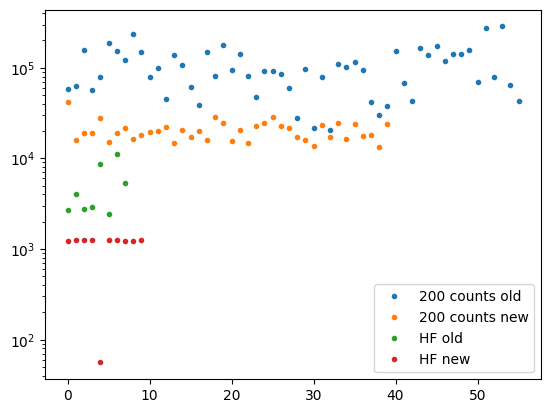

In [4]:
plt.figure()
plt.plot(data_200_old[0],'.',label='200 counts old' )
plt.plot(data_200_new[0],'.',label='200 counts new')
plt.plot(data_hf_old[0],'.',label='HF old')
plt.plot(data_hf_new[0],'.',label='HF new')
plt.yscale('log')
plt.legend()


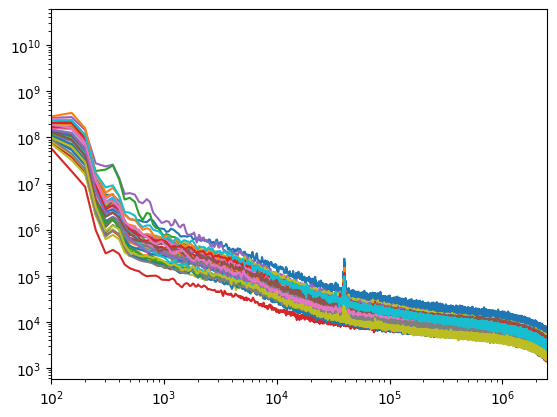

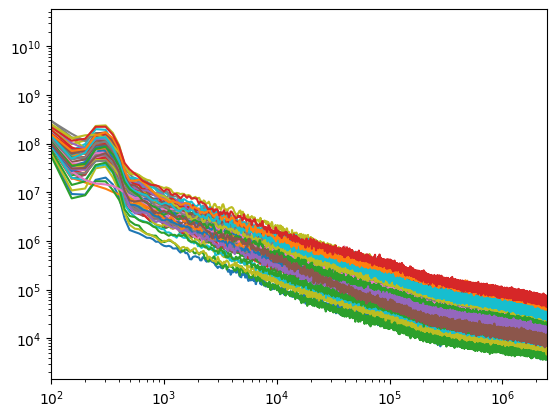

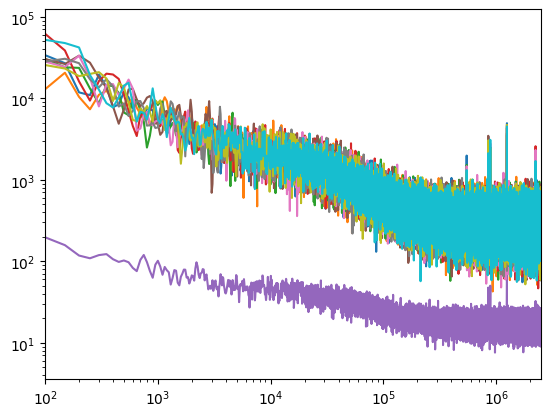

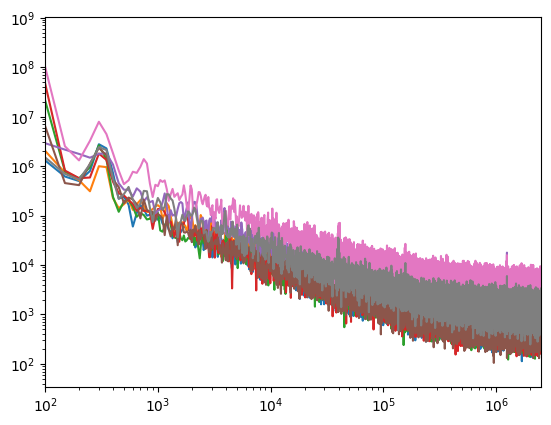

In [5]:
for data in [data_200_new,data_200_old,data_hf_new,data_hf_old]:
    plt.figure()
    for i in range(len(data[1])):
        plt.plot(data[1][i],data[2][i])
    plt.yscale('log')
    plt.xscale('log')
    plt.xlim([1e2,2.5e6])

In [6]:
sys.path.append(os.path.abspath(r"C:\Users\au617810\OneDrive - Aarhus universitet\Videnskabelig assistent\PICLab_narrow_linewidth"))
import beatnote_drift as bd

In [ ]:


# Load data with pandas
def load_beatnote_data(filepath):
    # Read data with pandas, specifying the column names and parse_dates for the timestamp column
    df = pd.read_csv(filepath,
                     sep = ' ',
                     names=['Date', 'Time', 'Frequency', 'Power'],
                     parse_dates={'Timestamp': ['Date', 'Time']},  # Combine date and time into one column
                     dayfirst=True,  # Specify that dates are in DD/MM/YYYY format
                     skiprows=1)

    timestamps = df['Timestamp'].values
    frequencies = df['Frequency'].values
    powers = df['Power'].values
    
    return timestamps, frequencies, powers



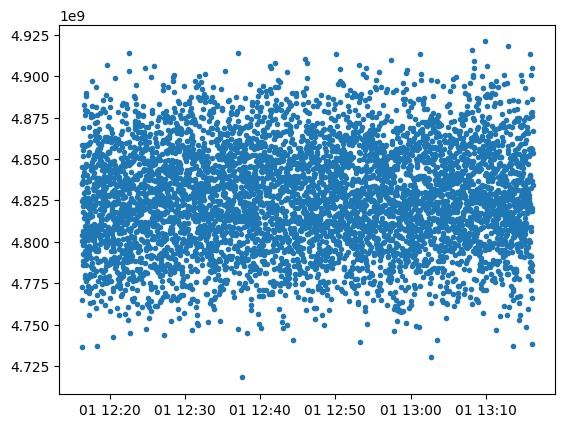

In [15]:
# Example usage:
filepath = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Weird_data\Old_lensed_fiber\Beatnote\2025-05-01_13-16-16-453345esa.txt"
timestamps, frequencies, powers = load_beatnote_data(filepath)
plt.plot(timestamps,frequencies,'.')

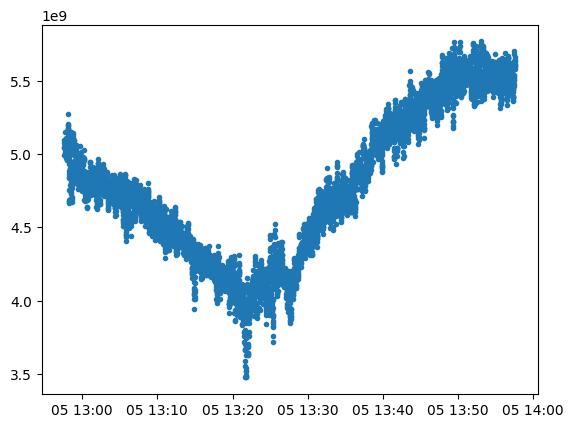

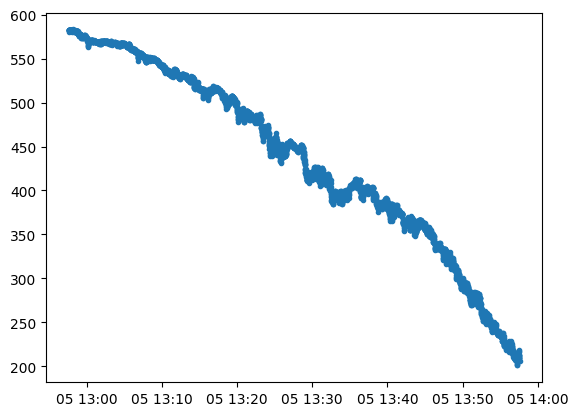

In [18]:
# Example usage:
filepath = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Weird_data\Old_lensed_fiber\Beatnote\2025-05-05_13-57-36-168640esa.txt"
timestamps, frequencies, powers = load_beatnote_data(filepath)
plt.plot(timestamps,frequencies,'.')
plt.figure()
plt.plot(timestamps,powers,'.')

In [20]:
from datetime import datetime
datetime.now().strftime("%d/%m/%Y %H:%M:%S:%f")

'07/05/2025 13:31:40:892311'